# Evaluación 3 - Machine Learning
## Autoencoder

**Asignatura:** Machine Learning  
**Unidad:** Deep Learning – Autoencoders  
**Estudiante:** Jorge Barrios

**Fecha:** 21-11-2025

En esta evaluación se implementa un Autoencoder en Keras/TensorFlow cumpliendo con:

1. Cargar el conjunto de datos  
2. Definir dimensiones de entrada y de representación latente  
3. Definir el codificador (encoder) y el decodificador (decoder)  
4. Crear el modelo autoencoder completo  
5. Crear el modelo codificador independiente  
6. Compilar, entrenar y presentar resultados del modelo


In [1]:
# 1) IMPORTAR LIBRERÍAS NECESARIAS
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, Model

# Para reproducibilidad (opcional)
np.random.seed(42)


In [2]:
#Usar MNIST (imágenes 28x28 de dígitos)

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalizar a [0,1] y agregar canal
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)  # (n, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)

print("Forma de x_train:", x_train.shape)
print("Forma de x_test:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de x_train: (60000, 28, 28, 1)
Forma de x_test: (10000, 28, 28, 1)


In [3]:
# Para imágenes (MNIST):
input_shape = x_train.shape[1:]  # (28, 28, 1)
latent_dim = 32  # tamaño de representación latente (puedes cambiarlo)

print("Dimensión de entrada:", input_shape)
print("Dimensión de la representación latente:", latent_dim)


Dimensión de entrada: (28, 28, 1)
Dimensión de la representación latente: 32


In [4]:
# CODIFICADOR (Encoder)
encoder_inputs = keras.Input(shape=input_shape, name="encoder_input")

x = layers.Flatten()(encoder_inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
latent = layers.Dense(latent_dim, activation="relu", name="latent_vector")(x)

encoder = Model(encoder_inputs, latent, name="encoder")
encoder.summary()

# DECODIFICADOR (Decoder)
decoder_inputs = keras.Input(shape=(latent_dim,), name="decoder_input")

x = layers.Dense(64, activation="relu")(decoder_inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(np.prod(input_shape), activation="sigmoid")(x)  # misma cantidad de pixeles
decoder_outputs = layers.Reshape(input_shape)(x)

decoder = Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# AUTOENCODER COMPLETO = encoder + decoder
autoencoder_inputs = encoder_inputs
encoded = encoder(autoencoder_inputs)
decoded = decoder(encoded)

autoencoder = Model(autoencoder_inputs, decoded, name="autoencoder")
autoencoder.summary()


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# El modelo 'encoder' ya está definido arriba.
# Lo usamos para obtener la representación latente de las imágenes.

sample_encoded = encoder.predict(x_test[:10])
print("Forma de la representación latente de 10 ejemplos:", sample_encoded.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Forma de la representación latente de 10 ejemplos: (10, 32)


In [7]:
# COMPILAR
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",   # error cuadrático medio
    metrics=["mae"]
)

# ENTRENAR
history = autoencoder.fit(
    x_train,
    x_train,              # objetivo: reconstruir la propia entrada
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0982 - mae: 0.2026 - val_loss: 0.0386 - val_mae: 0.0884
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0351 - mae: 0.0825 - val_loss: 0.0260 - val_mae: 0.0671
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0250 - mae: 0.0647 - val_loss: 0.0211 - val_mae: 0.0572
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0208 - mae: 0.0566 - val_loss: 0.0185 - val_mae: 0.0517
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0184 - mae: 0.0519 - val_loss: 0.0168 - val_mae: 0.0486
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0169 - mae: 0.0486 - val_loss: 0.0157 - val_mae: 0.0461
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0157 - mae: 0.0460 - val_loss: 0.0147 - val_mae: 0.0439
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0149 - mae: 0.0442 - val_loss: 0.0139 - val_mae: 0.0423
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/

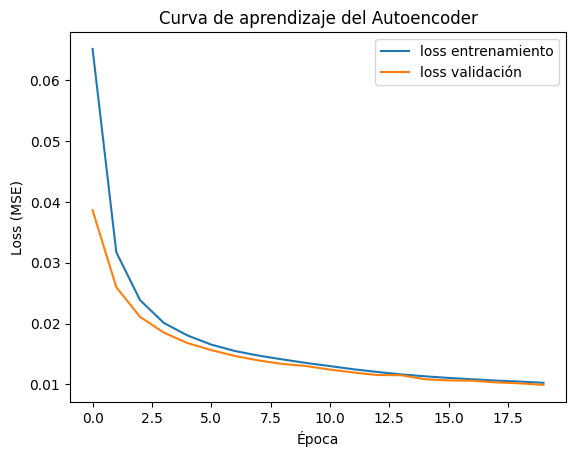

In [8]:
# GRAFICAR PÉRDIDA (loss) DE ENTRENAMIENTO Y VALIDACIÓN

plt.figure()
plt.plot(history.history["loss"], label="loss entrenamiento")
plt.plot(history.history["val_loss"], label="loss validación")
plt.xlabel("Época")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Curva de aprendizaje del Autoencoder")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


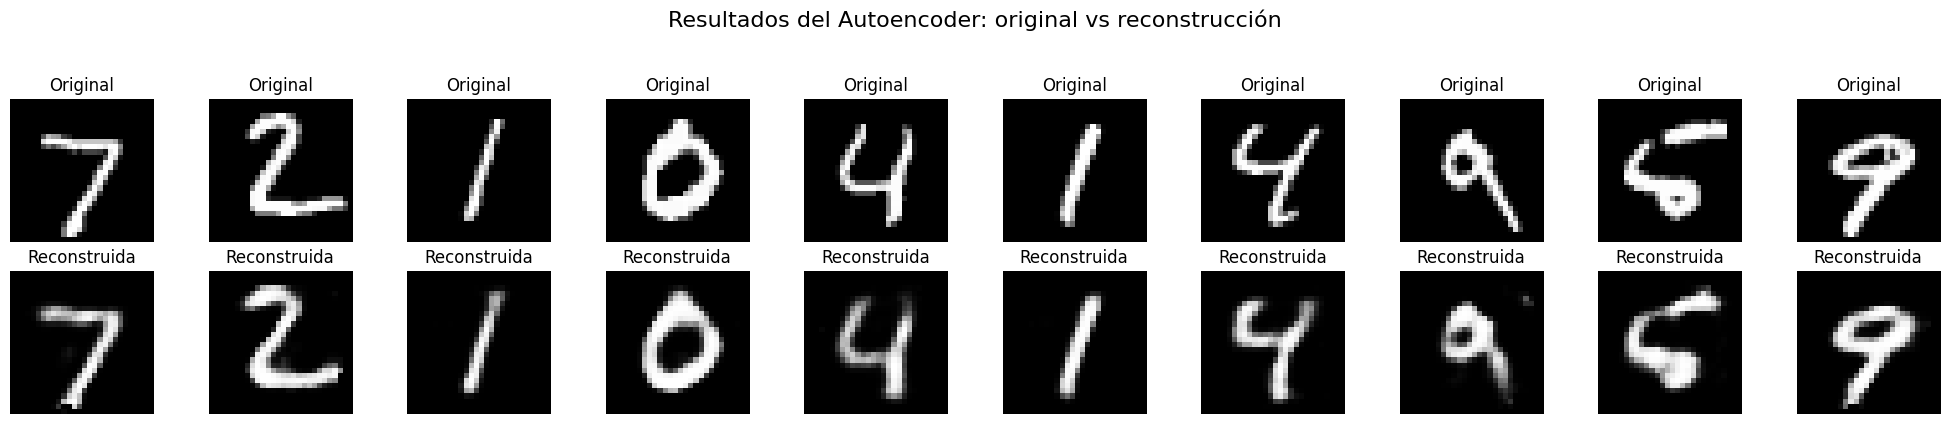

In [9]:
# RECONSTRUCCIONES
n = 10  # cantidad de imágenes a mostrar
test_samples = x_test[:n]
reconstructions = autoencoder.predict(test_samples)

plt.figure(figsize=(2 * n, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_samples[i].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructions[i].squeeze(), cmap="gray")
    plt.title("Reconstruida")
    plt.axis("off")

plt.suptitle("Resultados del Autoencoder: original vs reconstrucción", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


## Conclusiones

- Se cargó el conjunto de datos y se normalizó en el rango [0, 1].
- La dimensión de entrada utilizada fue `(28, 28, 1)` y la representación latente escogida fue de tamaño `32`.
- Se definió un **codificador** con capas densas que comprimen la información de la imagen a un vector de 32 dimensiones.
- Se definió un **decodificador** que toma el vector latente y reconstruye la imagen original.
- Se construyó el **modelo autoencoder** encadenando codificador y decodificador, y el **modelo codificador** independiente para obtener sólo la representación latente.
- El modelo se entrenó durante 20 épocas con función de pérdida MSE y optimizador Adam.  
- Las curvas de entrenamiento muestran (comenta aquí si la loss baja y se estabiliza, si hay overfitting, etc.).
- Visualmente, las reconstrucciones son (comenta si se parecen, qué tan nítidas son, posibles mejoras: más épocas, otra arquitectura, cambiar latent_dim, etc.).
